In [8]:
%%html
<style>
.output_subarea.output_text.output_stream.output_stdout > pre {
    width:max-content;
}
.p-Widget.jp-RenderedText.jp-OutputArea-output > pre {
   width:max-content;
}
</style>

In [1]:
import pandas as pd
import matplotlib

from pyspark.sql.functions import col, count as spark_count, avg as spark_avg

%matplotlib inline
pd.set_option('display.max_columns', 10000000)
pd.set_option('display.max_rows', 10000000)
pd.set_option('display.width', 10000000)
matplotlib.style.use('ggplot')

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Iniciamos Sesión con Ophelia

In [2]:
from enquire.vendetta import Ophelia

In [3]:
ophelia = Ophelia()


-Ophelia: ¡Hullo! My Name Is Ophelia, I Am Pleased To Meet You     [...]
-Ophelia: I Am An Artificial Assistant For Intelligent Investment  [...]
-Ophelia: Welcome To Your Asset Allocation System                  [...]


-Ophelia: V For VenData                                            [...]

                    - By. Vendetta Gentleman Club -                     

      █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █ █
      █ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ █
      █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █
      █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █
      █ ╬ ╬ ╬ █ █ █ █ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ █ █ █ █ ╬ ╬ ╬ █
      █ ╬ ╬ █ █ ╬ ╬ ╬ ╬ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ ╬ ╬ ╬ ╬ █ █ ╬ ╬ █
      █ ╬ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ ╬ ╬ ╬ ╬ ╬ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ ╬ █
      █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █
      █ ╬ ╬ ╬ ╬ █ █ █ █ █ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ ╬ █ █ █ █ █ ╬ ╬ ╬ ╬ █
      █ ╬ ╬ █ █ █ 

# Loading CSV daily price Funds file.

In [4]:
def read_portfolio_data(path_file, source, date_col, withSchema=True):
    spark = ophelia.spk
    portfolio_path_file = path_file
    portfolio_data = ophelia.tr.read_file(path_file, source, spark)
    if withSchema is True:
        return ophelia.tr.schema_define(portfolio_data, date_col)
    return portfolio_data

## Change impure schema portfolio input data.

In [6]:
portfolio_df = read_portfolio_data(
    path_file="data/master/ophelia/data/OpheliaData/analytical_base_table/",
    source="parquet",
    date_col="operation_date",
    withSchema=False
)

portfolio_df.limit(5).toPandas()

-Ophelia[INFO]: Reading Spark File [...]
-Ophelia[INFO]: Read Parquet Successfully From Path: data/master/ophelia/data/OpheliaData/analytical_base_table/ [...]


,SCOTIAG,AXESCP,BMERGOB,BMRGOB25,VALUEF4,BLKDIA7,BLKGUB1,GBMGUBL,INVEXGU,NTEGUB13,NTEGUB15,PRINFGU,ST&ER1X,STERGOB,SURCETE,VECTPRE,FONDEO,SCOTIA1,BMERLIQ28,DINBUR1,FONSER130,GBMF2,INBUMAX,INVEXCP,ACTIREN,SUR1E,MONEX28,BLKDIN45,VECTRF48,NTEMP+50,SBANKCP,BMERLIQ52,BMERTES,BMRGOB254,BLKDIA55,BLKLIQ/A,BLKPLUSA,FONSER161,PYMES,ST&ER1P,STER10P,SUPER,INVEXDX,HSBCEMP69,VECTRF71,SCOTIA2,ACTIGOB74,AFIRPLU,AXESMP76,BLK1LIQA,HSBCMP83,INVEXMP85,NTEMP+86,PRINFMP88,PRINMAS89,VECTMD92,HSBCEMP93,ACTIMED,ALTERNA,GBMF3,GBMM3,HSBCCOR,NTEDP,NTEMP+105,SURCORP,FINDE1110,SBANKMP,INVEXMP117,DMEDIO,PRINFMP119,NTEMP+120,BONDDIA,PRINMAS125,AXESMP130,GBMGUB,SCOTILP,INBUREX,PRINGLP,SUR30E,SURBONO,AXESLP,SCOTLPG,SCOTIMB,NAFINTR,PRINFTR,STEREAL,SURUDI,FT/REAL,VALUEF2,VALUEF7,SCOTUDI,SCOTDOL,BBVADOL183,INVEXCO185,VECTCOB188,HSBCDOL189,SBANKDL,BBVADOL195,INVEXCO197,VECTCOB200,HSBCDOL201,SCOT-FX,ACTICOB,BLKDOLS,PRGLOB,ST&ERUS,SURUSD,TEMGBIA,NAVIGTR,SCOTIPC,ACTIVAR,BMERIND,NAFINDX,SURIPC,VECTIND,ACTIPAT,BLKPAT,BLKIPC,GBMCRE,GBMMOD,HSBCBOL,INVEXMX,MAYA,NTESEL,PRINRVA,SURPAT,VECTPA,ACTINMO,BLKFIBR,SCOTUSA,ACTI500261,VECTSIC262,BLKUSEQ265,FRANOPR266,FRANUSA267,NTEUSA269,STERDOW270,ACTI500272,BLKUSEQ276,FRANOPR277,FRANUSA278,NTEUSA280,STERDOW281,VECTSIC282,AXESGLO,BLKINT1,GBMTRV,INVEXTK,NTEGLA,SURGLOB,SCOTEUR,AXESEDM,BBVAE50,SCOTI12,GBMPCON,PRINLS1,SURMOD,SVIVE50310,SCOTI14,ELITE/C,GBMPMOD314,HSBCF2,HSBCF3317,PRINLS2319,SUR2026320,SURCRE321,SVIVE35322,SBANK50,DIVER/A324,ELITE/M326,GOLD4MA329,PRINLS3331,SUR2034334,SUR2042335,SURAGR337,SVIVE20338,SCOTQNT,DIVER/A340,ELITE/M342,GBMPMOD344,GOLD4MA345,GOLD5MA,HSBCF3347,SURCRE352,SURAGR353,HSBCF4,PRINLS2357,PRINLS3358,GBMPICT,SVIVE60,SUR2018,HSBCJUB,SUR2026370,HSBC-50,SVIVE50376,SUR2034377,HSBC-60,SVIVE35383,SUR2042384,HSBC-70,SVIVE20390,HSBC-80,FINDE1400,ACTIGOB401,AXESMP402,HSBCMP405,INVEXMP407,NAFFP28,PRINFMP410,PRINMAS411,VECTMD414,operation_id,operation_date
0,3.534539,2.322772,43.207630,38.326050,99.350243,30.316860,2.256051,1.962767,174.947861,13.637304,13.637304,21.855124,20.055815,2.267400,2.187434,2.005288,1.334545,2.046245,44.219379,14.366350,54.741482,34.992599,8.611298,146.688705,10.868823,4.050180,22.307867,31.844082,1.770752,5.076499,8.143512,44.219379,157.345840,38.326050,30.316860,2.232722,15.629486,54.741482,32.153603,144.994492,10.257367,1.774597,214.215576,21.184620,1.770752,1.624755,5.389843,254.494202,2.349078,7.166708,18.815599,2.101484,5.076499,33.864136,20.654749,16.482002,21.184620,5.711125,4.832946,6.434399,8.881842,21.402399,13.989778,5.076499,2.200235,3.100926,1.296457,2.101484,303.871063,33.864136,5.076499,1.398587,20.654749,2.349078,4.009321,1.753930,29.660091,13.088516,3.992233,3.117309,2.708302,1.596222,1.950542,13.855604,13.443609,2.426237,1.544272,1.259296,129.802139,103.735077,1.933425,2.149874,21.983398,156.172974,9.058728,1.6176,1.260137,21.983398,156.172974,9.058728,1.6176,31.317511,26.997919,2.582447,21.106169,9.993435,3.999974,4.050396,4.103991,8.014604,91.944557,102.509247,51.945740,9.094406,2.312940,13.150075,6.105279,1.470150,7.609093,3.126285,39.672649,3.206381,41.770481,3.049110,15.298097,14.775409,1.710933,44.114136,1.416837,13.261822,5.619138,1.039979,3.331076,14.439363,3.375058,1.839695,4.803760,5.619138,3.331076,14.439363,3.375058,1.839695,4.803760,1.039979,2.616786,3.883566,2.067226,410.944397,8.207683,3.233640,1.588797,2.336484,2.660135,1.954495,2.560149,23.593775,1.607245,1.59,2.303810,10.296590,1.419937,2.08263,1.75438,27.343828,2.487756,1.633418,2.575157,2.859885,24.199217,1.607788,3.060286,30.577671,2.601453,2.669677,1.741012,97.503380,1.473619,24.199217,1.607788,1.419937,3.060286,449.165955,1.75438,1.633418,1.741012,1.45008,27.343828,30.577671,0.968364,2.001491,2.277523,1.44963,2.487756,1.44158,1.59,2.601453,1.51990,2.575157,2.669677,1.61320,97.503380,1.71924,3.100926,5.389843,2.349078,18.815599,2.101484,21.322126,33.864136,20.654749,16.482002,3761,2019-06-06
1,3.558632,2.334497,43.520493,38.602058,99.931274,30.529505,2.271766,1.976260,175.984039,13.730153,13.730153,

In [9]:
def join_price_lag(df, on="row_num", how="left"):
    portfolio_indexed = ophelia.df.row_index(df, "operation_date")
    lag_portfolio_df = ophelia.df.lag_min_max_data(df)
    lag_portfolio_indexed =ophelia.df.row_index(lag_portfolio_df, "operation_date_lag")
    join_indexed = portfolio_indexed.join(lag_portfolio_indexed, on=on, how=how)
    return join_indexed

In [11]:
join_price_lag = join_price_lag(portfolio_df)
join_price_lag.limit(5).toPandas()

00:27:16.795 Ophelia [INFO] Lag-Over Dates In Dataframe...


,row_num,SCOTIAG,AXESCP,BMERGOB,BMRGOB25,VALUEF4,BLKDIA7,BLKGUB1,GBMGUBL,INVEXGU,NTEGUB13,NTEGUB15,PRINFGU,ST&ER1X,STERGOB,SURCETE,VECTPRE,FONDEO,SCOTIA1,BMERLIQ28,DINBUR1,FONSER130,GBMF2,INBUMAX,INVEXCP,ACTIREN,SUR1E,MONEX28,BLKDIN45,VECTRF48,NTEMP+50,SBANKCP,BMERLIQ52,BMERTES,BMRGOB254,BLKDIA55,BLKLIQ/A,BLKPLUSA,FONSER161,PYMES,ST&ER1P,STER10P,SUPER,INVEXDX,HSBCEMP69,VECTRF71,SCOTIA2,ACTIGOB74,AFIRPLU,AXESMP76,BLK1LIQA,HSBCMP83,INVEXMP85,NTEMP+86,PRINFMP88,PRINMAS89,VECTMD92,HSBCEMP93,ACTIMED,ALTERNA,GBMF3,GBMM3,HSBCCOR,NTEDP,NTEMP+105,SURCORP,FINDE1110,SBANKMP,INVEXMP117,DMEDIO,PRINFMP119,NTEMP+120,BONDDIA,PRINMAS125,AXESMP130,GBMGUB,SCOTILP,INBUREX,PRINGLP,SUR30E,SURBONO,AXESLP,SCOTLPG,SCOTIMB,NAFINTR,PRINFTR,STEREAL,SURUDI,FT/REAL,VALUEF2,VALUEF7,SCOTUDI,SCOTDOL,BBVADOL183,INVEXCO185,VECTCOB188,HSBCDOL189,SBANKDL,BBVADOL195,INVEXCO197,VECTCOB200,HSBCDOL201,SCOT-FX,ACTICOB,BLKDOLS,PRGLOB,ST&ERUS,SURUSD,TEMGBIA,NAVIGTR,SCOTIPC,ACTIVAR,BMERIND,NAFINDX,SURIPC,VECTIND,ACTIPAT,BLKPAT,BLKIPC,GBMCRE,GBMMOD,HSBCBOL,INVEXMX,MAYA,NTESEL,PRINRVA,SURPAT,VECTPA,ACTINMO,BLKFIBR,SCOTUSA,ACTI500261,VECTSIC262,BLKUSEQ265,FRANOPR266,FRANUSA267,NTEUSA269,STERDOW270,ACTI500272,BLKUSEQ276,FRANOPR277,FRANUSA278,NTEUSA280,STERDOW281,VECTSIC282,AXESGLO,BLKINT1,GBMTRV,INVEXTK,NTEGLA,SURGLOB,SCOTEUR,AXESEDM,BBVAE50,SCOTI12,GBMPCON,PRINLS1,SURMOD,SVIVE50310,SCOTI14,ELITE/C,GBMPMOD314,HSBCF2,HSBCF3317,PRINLS2319,SUR2026320,SURCRE321,SVIVE35322,SBANK50,DIVER/A324,ELITE/M326,GOLD4MA329,PRINLS3331,SUR2034334,SUR2042335,SURAGR337,SVIVE20338,SCOTQNT,DIVER/A340,ELITE/M342,GBMPMOD344,GOLD4MA345,GOLD5MA,HSBCF3347,SURCRE352,SURAGR353,HSBCF4,PRINLS2357,PRINLS3358,GBMPICT,SVIVE60,SUR2018,HSBCJUB,SUR2026370,HSBC-50,SVIVE50376,SUR2034377,HSBC-60,SVIVE35383,SUR2042384,HSBC-70,SVIVE20390,HSBC-80,FINDE1400,ACTIGOB401,AXESMP402,HSBCMP405,INVEXMP407,NAFFP28,PRINFMP410,PRINMAS411,VECTMD414,operation_id,operation_date,SCOTIAG_lag,AXESCP_lag,BMERGOB_lag,BMRGOB25_lag,VALUEF4_lag,BLKDIA7_lag,BLKGUB1_lag,GBMGUBL_lag,INVEXGU_lag,NTEGUB13_lag,NTEGUB15_lag,PRINFGU_lag,ST&ER1X_lag,STERGOB_lag,SURCETE_lag,VECTPRE_lag,FONDEO_lag,SCOTIA1_lag,BMERLIQ28_lag,DINBUR1_lag,FONSER130_lag,GBMF2_lag,INBUMAX_lag,INVEXCP_lag,ACTIREN_lag,SUR1E_lag,MONEX28_lag,BLKDIN45_lag,VECTRF48_lag,NTEMP+50_lag,SBANKCP_lag,BMERLIQ52_lag,BMERTES_lag,BMRGOB254_lag,BLKDIA55_lag,BLKLIQ/A_lag,BLKPLUSA_lag,FONSER161_lag,PYMES_lag,ST&ER1P_lag,STER10P_lag,SUPER_lag,INVEXDX_lag,HSBCEMP69_lag,VECTRF71_lag,SCOTIA2_lag,ACTIGOB74_lag,AFIRPLU_lag,AXESMP76_lag,BLK1LIQA_lag,HSBCMP83_lag,INVEXMP85_lag,NTEMP+86_lag,PRINFMP88_lag,PRINMAS89_lag,VECTMD92_lag,HSBCEMP93_lag,ACTIMED_lag,ALTERNA_lag,GBMF3_lag,GBMM3_lag,HSBCCOR_lag,NTEDP_lag,NTEMP+105_lag,SURCORP_lag,FINDE1110_lag,SBANKMP_lag,INVEXMP117_lag,DMEDIO_lag,PRINFMP119_lag,NTEMP+120_lag,BONDDIA_lag,PRINMAS125_lag,AXESMP130_lag,GBMGUB_lag,SCOTILP_lag,INBUREX_lag,PRINGLP_lag,SUR30E_lag,SURBONO_lag,AXESLP_lag,SCOTLPG_lag,SCOTIMB_lag,NAFINTR_lag,PRINFTR_lag,STEREAL_lag,SURUDI_lag,FT/REAL_lag,VALUEF2_lag,VALUEF7_lag,SCOTUDI_lag,SCOTDOL_lag,BBVADOL183_lag,INVEXCO185_lag,VECTCOB188_lag,HSBCDOL189_lag,SBANKDL_lag,BBVADOL195_lag,INVEXCO197_lag,VECTCOB200_lag,HSBCDOL201_lag,SCOT-FX_lag,ACTICOB_lag,BLKDOLS_lag,PRGLOB_lag,ST&ERUS_lag,SURUSD_lag,TEMGBIA_lag,NAVIGTR_lag,SCOTIPC_lag,ACTIVAR_lag,BMERIND_lag,NAFINDX_lag,SURIPC_lag,VECTIND_lag,ACTIPAT_lag,BLKPAT_lag,BLKIPC_lag,GBMCRE_lag,GBMMOD_lag,HSBCBOL_lag,INVEXMX_lag,MAYA_lag,NTESEL_lag,PRINRVA_lag,SURPAT_lag,VECTPA_lag,ACTINMO_lag,BLKFIBR_lag,SCOTUSA_lag,ACTI500261_lag,VECTSIC262_lag,BLKUSEQ265_lag,FRANOPR266_lag,FRANUSA267_lag,NTEUSA269_lag,STERDOW270_lag,ACTI500272_lag,BLKUSEQ276_lag,FRANOPR277_lag,FRANUSA278_lag,NTEUSA280_lag,STERDOW281_lag,VECTSIC282_lag,AXESGLO_lag,BLKINT1_lag,GBMTRV_lag,INVEXTK_lag,NTEGLA_lag,SURGLOB_lag,SCOTEUR_lag,AXESEDM_lag,BBVAE50_lag,SCOTI12_lag,GBMPCON_lag,PRINLS1_lag,SURMOD_lag,SVIVE50310_lag,SCOTI14_lag,ELITE/C_lag,GBMPMOD314_lag,HSBCF2_lag,HSBCF3317_lag,PRINLS2319_lag,SUR2026320_lag,SURCRE321_lag,SVIV

In [18]:
def price_yield(df, fix_cols):
    float_cols = ophelia.arr.feature_picking(portfolio_df)["float"]
    formula_yield = [((col(c) / col("{0}_lag".format(c)) - 1)).alias("{0}_yield".format(c)) for c in float_cols]
    price_yield = df.select(*fix_cols, *formula_yield).na.fill(0)
    return price_yield

In [19]:
fix_cols = [
    "row_num", 
    "operation_id", 
    "operation_date"
]
portfolio_yield_df = price_yield(df=join_price_lag, fix_cols=fix_cols).orderBy(col("row_num"))
portfolio_yield_df.limit(5).toPandas()

11:20:14.966 Ophelia [INFO] Feature Picking Quite Well...
11:20:14.967 Ophelia [WARN] You Must Choose Between Them {'string', 'int', 'float', 'date'}...


,row_num,operation_id,operation_date,SCOTIAG_yield,AXESCP_yield,BMERGOB_yield,BMRGOB25_yield,VALUEF4_yield,BLKDIA7_yield,BLKGUB1_yield,GBMGUBL_yield,INVEXGU_yield,NTEGUB13_yield,NTEGUB15_yield,PRINFGU_yield,ST&ER1X_yield,STERGOB_yield,SURCETE_yield,VECTPRE_yield,FONDEO_yield,SCOTIA1_yield,BMERLIQ28_yield,DINBUR1_yield,FONSER130_yield,GBMF2_yield,INBUMAX_yield,INVEXCP_yield,ACTIREN_yield,SUR1E_yield,MONEX28_yield,BLKDIN45_yield,VECTRF48_yield,NTEMP+50_yield,SBANKCP_yield,BMERLIQ52_yield,BMERTES_yield,BMRGOB254_yield,BLKDIA55_yield,BLKLIQ/A_yield,BLKPLUSA_yield,FONSER161_yield,PYMES_yield,ST&ER1P_yield,STER10P_yield,SUPER_yield,INVEXDX_yield,HSBCEMP69_yield,VECTRF71_yield,SCOTIA2_yield,ACTIGOB74_yield,AFIRPLU_yield,AXESMP76_yield,BLK1LIQA_yield,HSBCMP83_yield,INVEXMP85_yield,NTEMP+86_yield,PRINFMP88_yield,PRINMAS89_yield,VECTMD92_yield,HSBCEMP93_yield,ACTIMED_yield,ALTERNA_yield,GBMF3_yield,GBMM3_yield,HSBCCOR_yield,NTEDP_yield,NTEMP+105_yield,SURCORP_yield,FINDE1110_yield,SBANKMP_yield,INVEXMP117_yield,DMEDIO_yield,PRINFMP119_yield,NTEMP+120_yield,BONDDIA_yield,PRINMAS125_yield,AXESMP130_yield,GBMGUB_yield,SCOTILP_yield,INBUREX_yield,PRINGLP_yield,SUR30E_yield,SURBONO_yield,AXESLP_yield,SCOTLPG_yield,SCOTIMB_yield,NAFINTR_yield,PRINFTR_yield,STEREAL_yield,SURUDI_yield,FT/REAL_yield,VALUEF2_yield,VALUEF7_yield,SCOTUDI_yield,SCOTDOL_yield,BBVADOL183_yield,INVEXCO185_yield,VECTCOB188_yield,HSBCDOL189_yield,SBANKDL_yield,BBVADOL195_yield,INVEXCO197_yield,VECTCOB200_yield,HSBCDOL201_yield,SCOT-FX_yield,ACTICOB_yield,BLKDOLS_yield,PRGLOB_yield,ST&ERUS_yield,SURUSD_yield,TEMGBIA_yield,NAVIGTR_yield,SCOTIPC_yield,ACTIVAR_yield,BMERIND_yield,NAFINDX_yield,SURIPC_yield,VECTIND_yield,ACTIPAT_yield,BLKPAT_yield,BLKIPC_yield,GBMCRE_yield,GBMMOD_yield,HSBCBOL_yield,INVEXMX_yield,MAYA_yield,NTESEL_yield,PRINRVA_yield,SURPAT_yield,VECTPA_yield,ACTINMO_yield,BLKFIBR_yield,SCOTUSA_yield,ACTI500261_yield,VECTSIC262_yield,BLKUSEQ265_yield,FRANOPR266_yield,FRANUSA267_yield,NTEUSA269_yield,STERDOW270_yield,ACTI500272_yield,BLKUSEQ276_yield,FRANOPR277_yield,FRANUSA278_yield,NTEUSA280_yield,STERDOW281_yield,VECTSIC282_yield,AXESGLO_yield,BLKINT1_yield,GBMTRV_yield,INVEXTK_yield,NTEGLA_yield,SURGLOB_yield,SCOTEUR_yield,AXESEDM_yield,BBVAE50_yield,SCOTI12_yield,GBMPCON_yield,PRINLS1_yield,SURMOD_yield,SVIVE50310_yield,SCOTI14_yield,ELITE/C_yield,GBMPMOD314_yield,HSBCF2_yield,HSBCF3317_yield,PRINLS2319_yield,SUR2026320_yield,SURCRE321_yield,SVIVE35322_yield,SBANK50_yield,DIVER/A324_yield,ELITE/M326_yield,GOLD4MA329_yield,PRINLS3331_yield,SUR2034334_yield,SUR2042335_yield,SURAGR337_yield,SVIVE20338_yield,SCOTQNT_yield,DIVER/A340_yield,ELITE/M342_yield,GBMPMOD344_yield,GOLD4MA345_yield,GOLD5MA_yield,HSBCF3347_yield,SURCRE352_yield,SURAGR353_yield,HSBCF4_yield,PRINLS2357_yield,PRINLS3358_yield,GBMPICT_yield,SVIVE60_yield,SUR2018_yield,HSBCJUB_yield,SUR2026370_yield,HSBC-50_yield,SVIVE50376_yield,SUR2034377_yield,HSBC-60_yield,SVIVE35383_yield,SUR2042384_yield,HSBC-70_yield,SVIVE20390_yield,HSBC-80_yield,FINDE1400_yield,ACTIGOB401_yield,AXESMP402_yield,HSBCMP405_yield,INVEXMP407_yield,NAFFP28_yield,PRINFMP410_yield,PRINMAS411_yield,VECTMD414_yield
0,1,3811,2019-08-15,0.000198,0.000153,0.000211,0.000197,0.000175,0.000207,0.000206,0.000202,0.000177,0.000202,0.000202,0.000185,0.000134,0.000191,0.000199,0.000147,0.000203,0.000206,0.000218,0.000172,0.000199,0.000217,0.000202,0.000172,0.000131,0.000141,0.000180,0.000203,0.000204,0.000193,0.000206,0.000218,0.000206,0.000197,0.000207,0.000173,0.000206,0.000199,0.000154,0.000154,0.000182,0.000197,0.000198,0.000172,0.000204,0.000082,0.000208,0.000246,0.000152,0.000200,0.000169,0.000171,0.000193,0.000058,0.000097,0.000141,0.000172,0.000316,0.000300,0.000116,0.000174,-0.000032,0.000209,0.000193,0.000014,0.000099,0.000293,0.000171,-0.000232,0.000058,0.000193,0.000185,0.000097,0.000152,0.000199,-0.000912,-0.000269,-0.001137,-0.001181,-0.001279,-0.000379,-0.002139,-0.001548,-0.000147,-0.000959,-0.001046,-0.000642,-0.000980

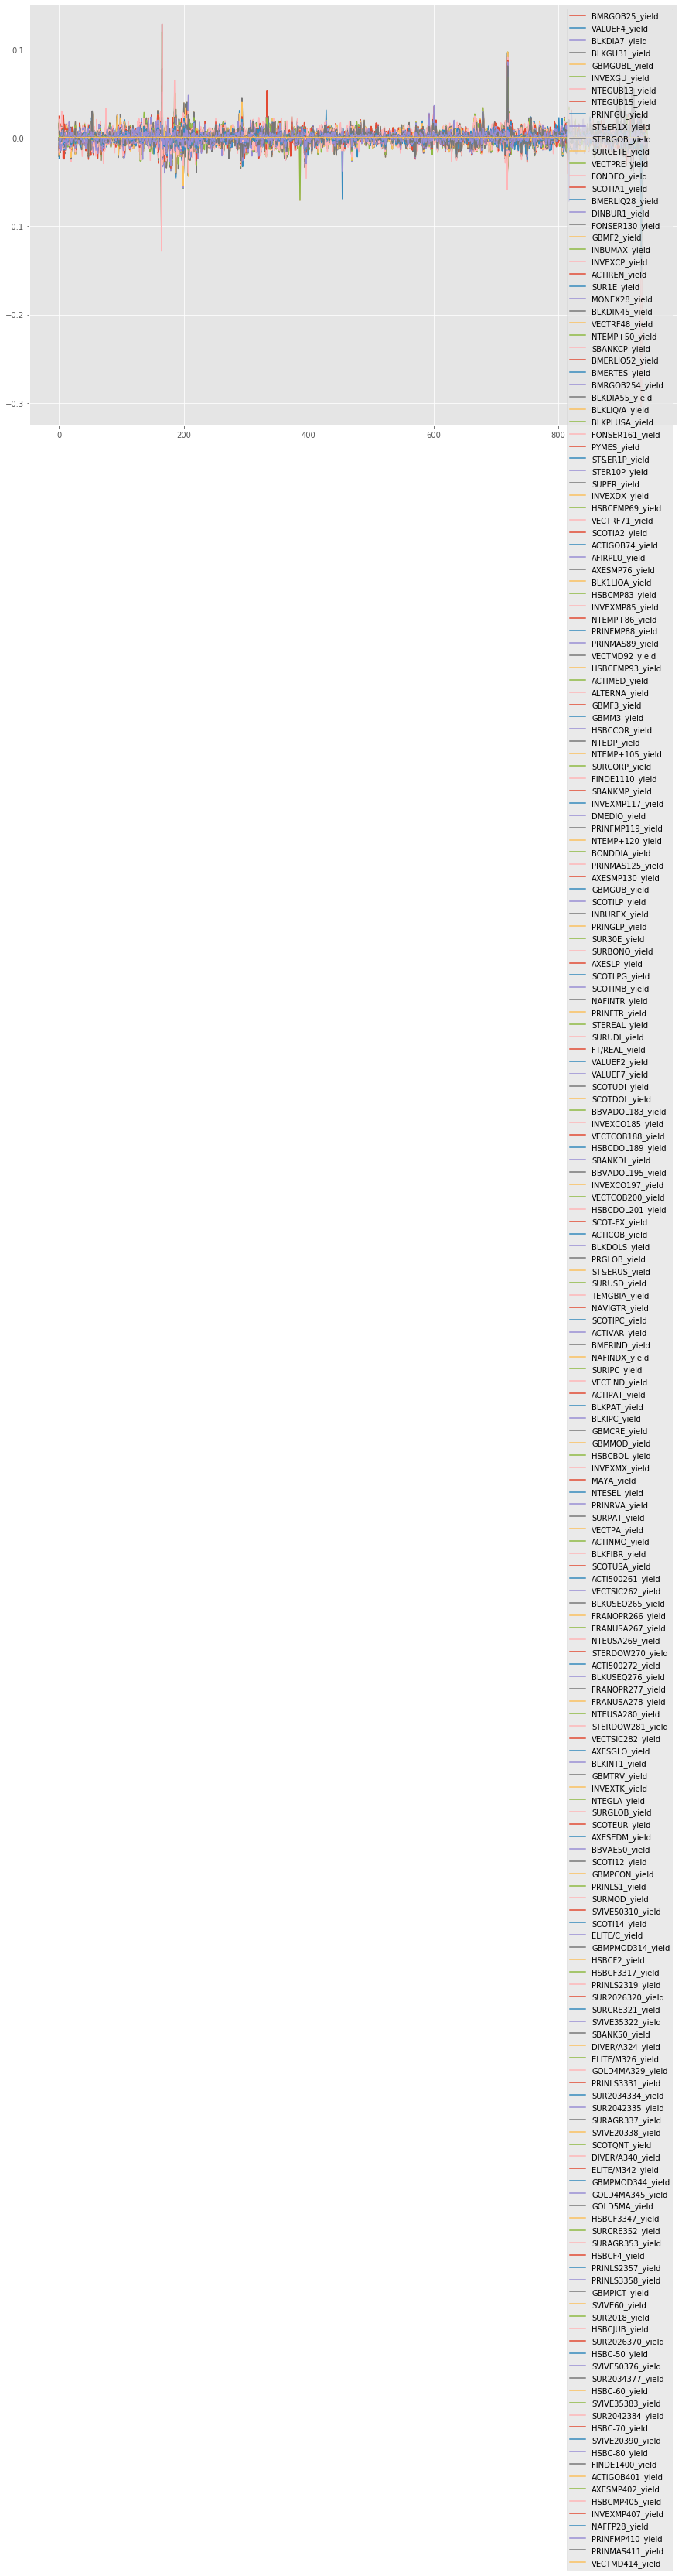

In [22]:
fixed_df = portfolio_yield_df.select(portfolio_yield_df.columns[6:]).toPandas()
fixed_df.plot(figsize=(15, 10))

# Writing Portfolio's Yield dataframe.

In [24]:
price_path = ophelia.tr.write_parquet(
    dataframe=portfolio_yield_df, 
    name_directory="yield_portfolio_price", 
    partition_field="operation_date"
)

-Ophelia[INFO]: Writing Parquet [...]
-Ophelia[INFO]: Writing Root Parquet Successfully [...]
-Ophelia[INFO]: Parquet Parts Partitioned By: ['operation_date'] [...]
-Ophelia[INFO]: This is Your New Parquet Path: data/master/ophelia/data/OpheliaData/yield_portfolio_price/operation_date=yyy-MM-dd [...]


In [25]:
def read_yield(parquet_path, source="parquet"):
    spark = ophelia.spk
    yield_df = ophelia.tr.read_file(path_source=parquet_path, source=source, spark_session=spark)
    return yield_df

In [26]:
yield_porfolio_df = read_yield(parquet_path=price_path)
yield_porfolio_df.orderBy(col("operation_date").desc()).limit(5).toPandas()

-Ophelia[INFO]: Reading Spark File [...]
-Ophelia[INFO]: Read Parquet Successfully From Path: data/master/ophelia/data/OpheliaData/yield_portfolio_price/ [...]


,row_num,operation_id,SCOTIAG_yield,AXESCP_yield,BMERGOB_yield,BMRGOB25_yield,VALUEF4_yield,BLKDIA7_yield,BLKGUB1_yield,GBMGUBL_yield,INVEXGU_yield,NTEGUB13_yield,NTEGUB15_yield,PRINFGU_yield,ST&ER1X_yield,STERGOB_yield,SURCETE_yield,VECTPRE_yield,FONDEO_yield,SCOTIA1_yield,BMERLIQ28_yield,DINBUR1_yield,FONSER130_yield,GBMF2_yield,INBUMAX_yield,INVEXCP_yield,ACTIREN_yield,SUR1E_yield,MONEX28_yield,BLKDIN45_yield,VECTRF48_yield,NTEMP+50_yield,SBANKCP_yield,BMERLIQ52_yield,BMERTES_yield,BMRGOB254_yield,BLKDIA55_yield,BLKLIQ/A_yield,BLKPLUSA_yield,FONSER161_yield,PYMES_yield,ST&ER1P_yield,STER10P_yield,SUPER_yield,INVEXDX_yield,HSBCEMP69_yield,VECTRF71_yield,SCOTIA2_yield,ACTIGOB74_yield,AFIRPLU_yield,AXESMP76_yield,BLK1LIQA_yield,HSBCMP83_yield,INVEXMP85_yield,NTEMP+86_yield,PRINFMP88_yield,PRINMAS89_yield,VECTMD92_yield,HSBCEMP93_yield,ACTIMED_yield,ALTERNA_yield,GBMF3_yield,GBMM3_yield,HSBCCOR_yield,NTEDP_yield,NTEMP+105_yield,SURCORP_yield,FINDE1110_yield,SBANKMP_yield,INVEXMP117_yield,DMEDIO_yield,PRINFMP119_yield,NTEMP+120_yield,BONDDIA_yield,PRINMAS125_yield,AXESMP130_yield,GBMGUB_yield,SCOTILP_yield,INBUREX_yield,PRINGLP_yield,SUR30E_yield,SURBONO_yield,AXESLP_yield,SCOTLPG_yield,SCOTIMB_yield,NAFINTR_yield,PRINFTR_yield,STEREAL_yield,SURUDI_yield,FT/REAL_yield,VALUEF2_yield,VALUEF7_yield,SCOTUDI_yield,SCOTDOL_yield,BBVADOL183_yield,INVEXCO185_yield,VECTCOB188_yield,HSBCDOL189_yield,SBANKDL_yield,BBVADOL195_yield,INVEXCO197_yield,VECTCOB200_yield,HSBCDOL201_yield,SCOT-FX_yield,ACTICOB_yield,BLKDOLS_yield,PRGLOB_yield,ST&ERUS_yield,SURUSD_yield,TEMGBIA_yield,NAVIGTR_yield,SCOTIPC_yield,ACTIVAR_yield,BMERIND_yield,NAFINDX_yield,SURIPC_yield,VECTIND_yield,ACTIPAT_yield,BLKPAT_yield,BLKIPC_yield,GBMCRE_yield,GBMMOD_yield,HSBCBOL_yield,INVEXMX_yield,MAYA_yield,NTESEL_yield,PRINRVA_yield,SURPAT_yield,VECTPA_yield,ACTINMO_yield,BLKFIBR_yield,SCOTUSA_yield,ACTI500261_yield,VECTSIC262_yield,BLKUSEQ265_yield,FRANOPR266_yield,FRANUSA267_yield,NTEUSA269_yield,STERDOW270_yield,ACTI500272_yield,BLKUSEQ276_yield,FRANOPR277_yield,FRANUSA278_yield,NTEUSA280_yield,STERDOW281_yield,VECTSIC282_yield,AXESGLO_yield,BLKINT1_yield,GBMTRV_yield,INVEXTK_yield,NTEGLA_yield,SURGLOB_yield,SCOTEUR_yield,AXESEDM_yield,BBVAE50_yield,SCOTI12_yield,GBMPCON_yield,PRINLS1_yield,SURMOD_yield,SVIVE50310_yield,SCOTI14_yield,ELITE/C_yield,GBMPMOD314_yield,HSBCF2_yield,HSBCF3317_yield,PRINLS2319_yield,SUR2026320_yield,SURCRE321_yield,SVIVE35322_yield,SBANK50_yield,DIVER/A324_yield,ELITE/M326_yield,GOLD4MA329_yield,PRINLS3331_yield,SUR2034334_yield,SUR2042335_yield,SURAGR337_yield,SVIVE20338_yield,SCOTQNT_yield,DIVER/A340_yield,ELITE/M342_yield,GBMPMOD344_yield,GOLD4MA345_yield,GOLD5MA_yield,HSBCF3347_yield,SURCRE352_yield,SURAGR353_yield,HSBCF4_yield,PRINLS2357_yield,PRINLS3358_yield,GBMPICT_yield,SVIVE60_yield,SUR2018_yield,HSBCJUB_yield,SUR2026370_yield,HSBC-50_yield,SVIVE50376_yield,SUR2034377_yield,HSBC-60_yield,SVIVE35383_yield,SUR2042384_yield,HSBC-70_yield,SVIVE20390_yield,HSBC-80_yield,FINDE1400_yield,ACTIGOB401_yield,AXESMP402_yield,HSBCMP405_yield,INVEXMP407_yield,NAFFP28_yield,PRINFMP410_yield,PRINMAS411_yield,VECTMD414_yield,operation_date
0,1,3811,0.000198,0.000153,0.000211,0.000197,0.000175,0.000207,0.000206,0.000202,0.000177,0.000202,0.000202,0.000185,0.000134,0.000191,0.000199,0.000147,0.000203,0.000206,0.000218,0.000172,0.000199,0.000217,0.000202,0.000172,0.000131,0.000141,0.000180,0.000203,0.000204,0.000193,0.000206,0.000218,0.000206,0.000197,0.000207,0.000173,0.000206,0.000199,0.000154,0.000154,0.000182,0.000197,0.000198,0.000172,0.000204,0.000082,0.000208,0.000246,0.000152,0.000200,0.000169,0.000171,0.000193,0.000058,0.000097,0.000141,0.000172,0.000316,0.000300,0.000116,0.000174,-0.000032,0.000209,0.000193,0.000014,0.000099,0.000293,0.000171,-0.000232,0.000058,0.000193,0.000185,0.000097,0.000152,0.000199,-0.000912,-0.000269,-0.001137,-0.001181,-0.001279,-0.000379,-0.002139,-0.001548,-0.000147,-0.000959,-0.001046,-0.000642,-0.000980,-0.001570,